In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import hist
hep.style.use("CMS")

Read in the data

In [15]:
results = np.load("../plots/march14_disco_500x500_batch25_obj46_alpha1/disco_results.npy")

suep_ntracks = results[results[:,2] == 1][:,1]
suep_cl = results[results[:,2] == 1][:,0]
qcd_ntracks = results[results[:,2] == 0][:,1]
qcd_cl = results[results[:,2] == 0][:,0]

Make 2D histograms using the ABCD variables.

In [16]:
hist_abcd = (
     hist.new
    .Regular(50, 0, 300, name="n_tracks", label="# Tracks")
    .Regular(20, 0, 1, name="classifier_output", label="Classifier Output")
    .Weight()
)

hist_abcd.fill(qcd_ntracks, qcd_cl)

Hist(
  Regular(50, 0, 300, name='n_tracks', label='# Tracks'),
  Regular(20, 0, 1, name='classifier_output', label='Classifier Output'),
  storage=Weight()) # Sum: WeightedSum(value=50002, variance=50002)

In [17]:
hist_abcd_suep = (
     hist.new
    .Regular(50, 0, 300, name="n_tracks", label="# Tracks")
    .Regular(20, 0, 1, name="classifier_output", label="Classifier Output")
    .Weight()
)

hist_abcd_suep.fill(suep_ntracks, suep_cl)

Hist(
  Regular(50, 0, 300, name='n_tracks', label='# Tracks'),
  Regular(20, 0, 1, name='classifier_output', label='Classifier Output'),
  storage=Weight()) # Sum: WeightedSum(value=49998, variance=49998)

Make 1D projections out of the 2D histograms.

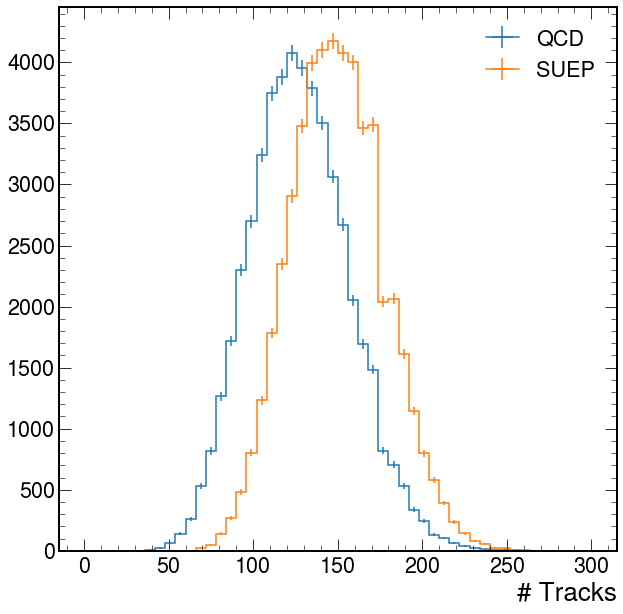

In [18]:
_ = hep.histplot(hist_abcd.project(0), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(0), label="SUEP")
_ = plt.legend()

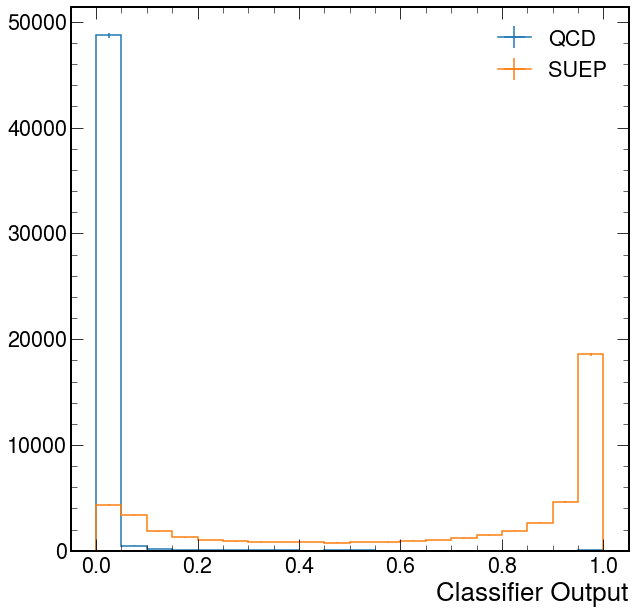

In [19]:
_ = hep.histplot(hist_abcd.project(1), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(1), label="SUEP")
_ = plt.legend()

Check for closure in D region for QCD.

In [20]:
ntracks_cut = 150j
cl_cut = 0.5j

A = hist_abcd[:ntracks_cut, :cl_cut]
B = hist_abcd[ntracks_cut:, :cl_cut]
C = hist_abcd[:ntracks_cut, cl_cut:]
D = hist_abcd[ntracks_cut:, cl_cut:]
D_exp = C.copy() * B.sum().value / A.sum().value

In [21]:
# FIXME: why why why why why do you need to cut again
D_cl = D[ntracks_cut::sum,cl_cut:]
D_exp_cl = D_exp[:ntracks_cut:sum,cl_cut:]

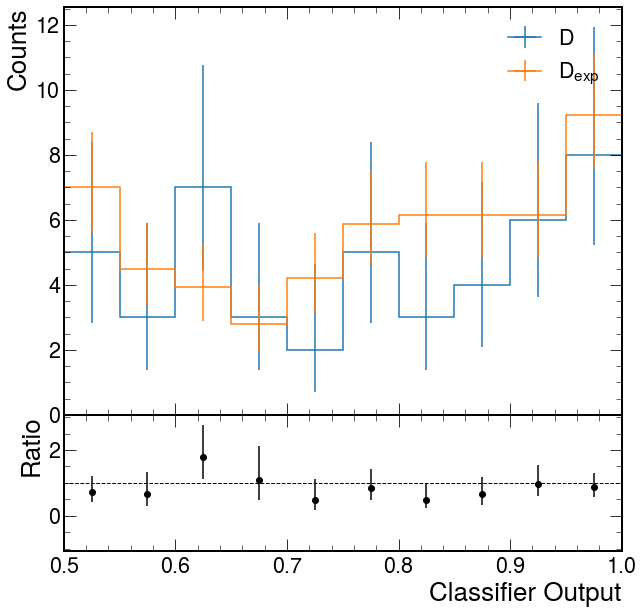

In [22]:
# Unclear documentation, arguments can be found in:
# https://github.com/scikit-hep/hist/blob/main/src/hist/plot.py
_ = D_cl.plot_ratio(D_exp_cl,
                   rp_num_label='D',
                   rp_denom_label='$D_{exp}$')

Check for indendence of the two ABCD variables by making 1D histograms of different slices.

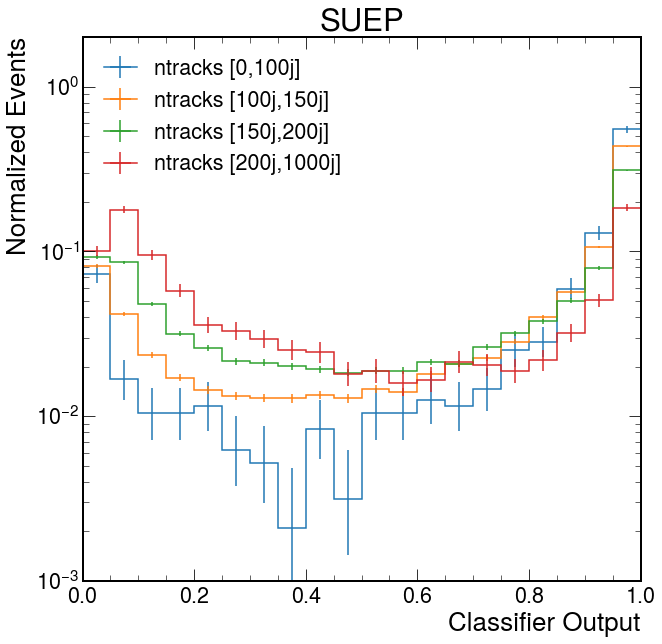

In [23]:
# parameters
save = True
slice_label = 'ntracks'            
slices = [[0,100j],[100j,150j],[150j,200j],[200j,1000j]]

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd_suep[val_lo:val_up:sum,:]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo, val_up))    

plt.legend()
plt.title("SUEP")
plt.xlim(0.0,1.0)
plt.ylim(1e-3,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output")
if save: plt.savefig("SUEP_1D_slices.png",  bbox_inches='tight')

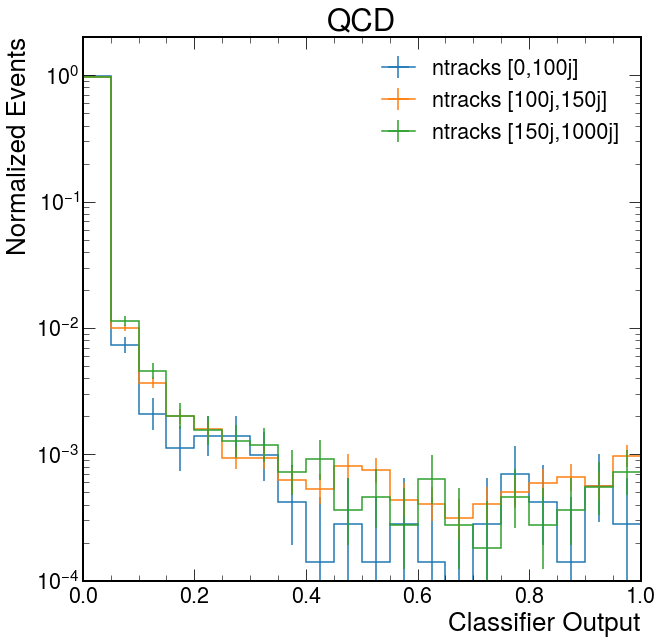

In [24]:
# parameters
save = True
slice_label = 'ntracks'            
slices = [[0,100j],[100j,150j],[150j,1000j]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd[val_lo:val_up:sum,:]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo, val_up))    

plt.legend()
plt.title("QCD")
plt.xlim(0.0,1.0)
plt.ylim(1e-4,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output")
if save: plt.savefig("QCD_1D_slices.png",  bbox_inches='tight')